# Homework Image Enhancement 2

Pneumonia or chronic pneumonia is a disease that occurs in approximately 8-10% of patients with acute respiratory infections. It is the number one cause of death for infectious diseases among children under 5 years of age. It is caused by two main groups: infectious pneumonia and non-infectious pneumonia. If we can develop an AI system to help diagnose early disease. Identifying the types of Pneumonia can be helpful in making a diagnosis. and care from the beginning

The images that will be used for Image enhancement are images from Chest X-Rays in Patients with Pneumonia.

next will be design proposed method for improving the image quality.

Code Colab : https://colab.research.google.com/drive/1PNstjs3jf44IWBqPh-UKMRInKwwJGEFL?usp=sharing

## Import Library

In [216]:
!gdown --id 12vf3-yTT7Ka7dmnsYN4VF3t9FVz3-YDq

Downloading...
From: https://drive.google.com/uc?id=12vf3-yTT7Ka7dmnsYN4VF3t9FVz3-YDq
To: /content/pneumonia.jpeg
100% 60.8k/60.8k [00:00<00:00, 52.1MB/s]


In [217]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Read Image

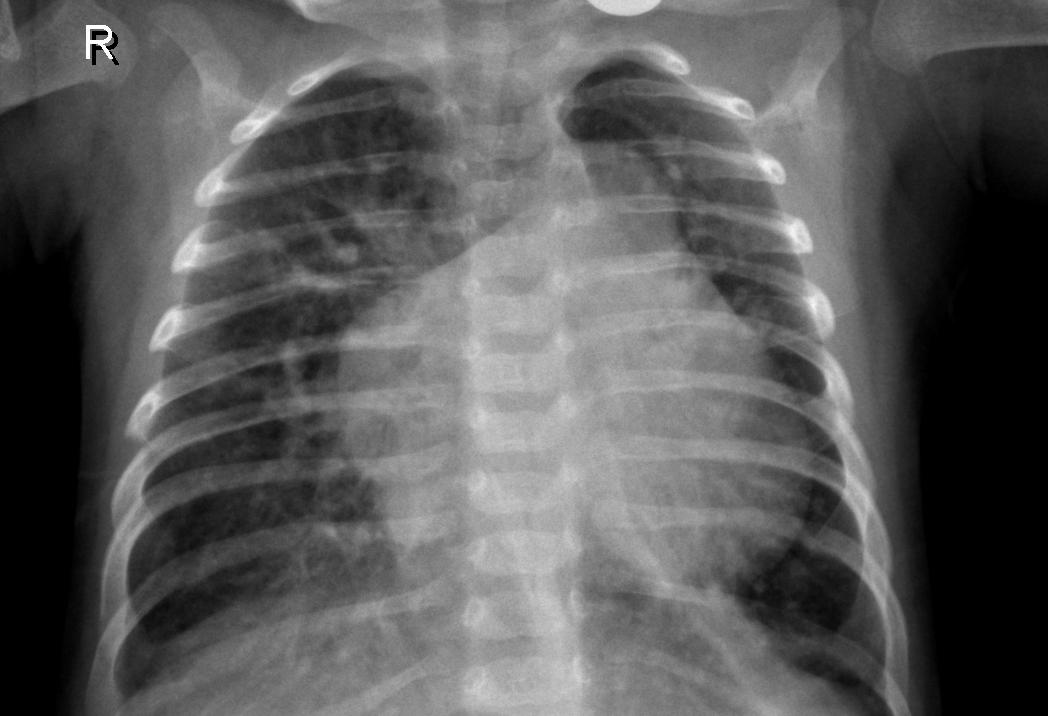

In [218]:
image = cv2.imread("/content/pneumonia.jpeg")
cv2_imshow(image)

## Resize Image

As the imported images are large, they need to be resized to make them easier to use.

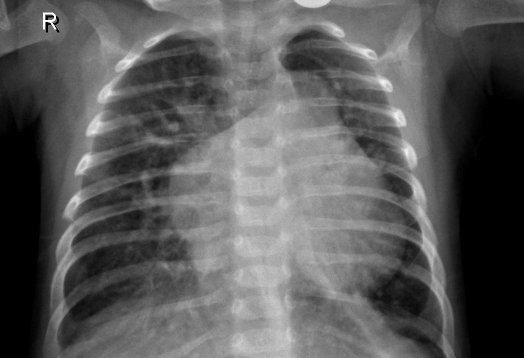

In [219]:
image = cv2.resize(image, (0, 0), fx = 0.5, fy = 0.5)
cv2_imshow(image)

After resizing, the image is taken for Gray Level Transformation by adding coeff and gamma to make the image detail clearer.

## Gray Level Transformation

In [220]:
def GLT (image, transform, coeff = 1.0, gamma = 1.0):
  #build lookup table to map the pixel value [0,255] to their gray level transformation 
  if transform == 'negative':
    table = np.array([256-1-i for i in np.arange (0,256)]).astype("uint8")

  elif transform == 'identity':
    table = np.array([i for i in np.arange (0,256)]).astype("uint8") 

  elif transform == 'log':
    table = np.array([10*coeff*(np.log10(1+i)) for i in np.arange (0,256)]).astype("uint8") 
  
  elif transform == 'invlog':
    table = np.array([10*coeff/(np.log10 (1+i)+1) for i in np.arange (0,256)]).astype("uint8")

  elif transform == 'root' :
    invGamma = 1.0/gamma 
    table = np.array([coeff*((i/255.0)**invGamma)*255 for i in np.arange (0,256)]).astype("uint8")

  elif transform == 'power':
    table = np.array([coeff*((i/255.0)**gamma)*255 for i in np.arange (0,256)]).astype("uint8") 
    
  return cv2.LUT(image, table)

### Power

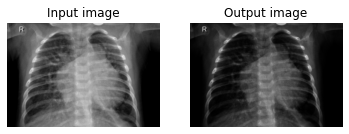

In [221]:
transform = 'power'
coeff = 1 # For negative c = -1; for identity c = 1; for other, c is integer 
gamma = 2 # Gamma is used for root and power 

img = GLT(image, transform, coeff = coeff, gamma = gamma) 

plt.subplot(121) 
plt.imshow(image, 'gray') 
plt.title('Input image', fontsize=12)
plt.axis("off") 

plt.subplot(122) 
plt.imshow(img, 'gray') 
plt.title('Output image', fontsize=12) 
plt.axis("off") 
plt.show()

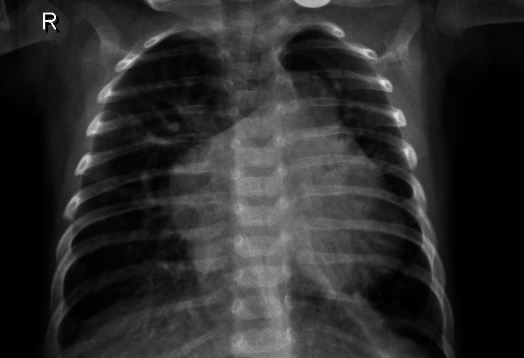

In [222]:
cv2_imshow(img)

In [223]:
cv2.imwrite('img_power_tran.jpg', img)

True

## Histogram Equalization

Histogram equalization distributes the gray level to reach the maximum gray level (white) because the cumulative distribution function equals 1 when 0 ≤ r ≤ L−1

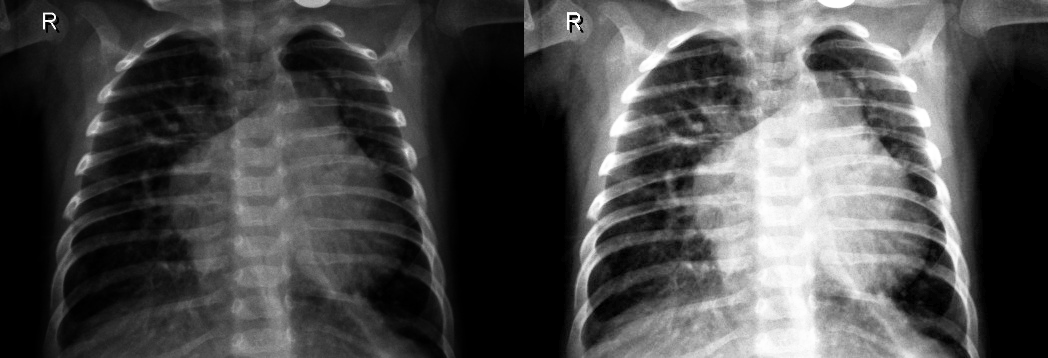

In [224]:
img = cv2.imread('img_power_tran.jpg',0)
equ_img = cv2.equalizeHist(img)
res = np.hstack((img,equ_img)) 
cv2.imwrite('equ_img.jpg', equ_img)
cv2_imshow(res)


Use histogram equalization technique. to increase the intensity of gray level

## Bit Plane Slicing

Bit plane slicing is a method of representing an image with one or more bits of the byte used for each pixel.

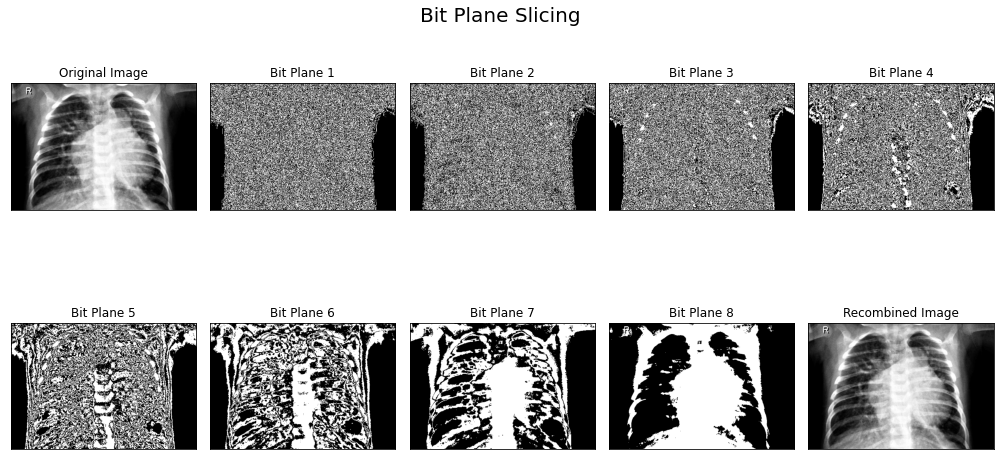

In [225]:
import numpy as np
import cv2

bp = cv2.imread('equ_img.jpg',0)
bit_title = ["Original Image", "Bit Plane 1", "Bit Plane 2", "Bit Plane 3", "Bit Plane 4",
             "Bit Plane 5", "Bit Plane 6", "Bit Plane 7", "Bit Plane 8", "Recombined Image"]

# Method : Using mod
b1 = np.mod(bp, 2)
b2 = np.mod(np.floor(bp/2), 2)
b3 = np.mod(np.floor(bp/4), 2)
b4 = np.mod(np.floor(bp/8), 2)
b5 = np.mod(np.floor(bp/16), 2)
b6 = np.mod(np.floor(bp/32), 2)
b7 = np.mod(np.floor(bp/64), 2)
b8 = np.mod(np.floor(bp/128), 2)

bb = (2 * (2 * (2 * (2 * (2 * (2 * (2 * b8 + b7) + b6) + b5) + b4) + b3) + b2) + b1);

list_bit = [bp, b1, b2, b3, b4, b5, b6, b7, b8, bb]


fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(14, 8), subplot_kw={'xticks': [], 'yticks': []})
fig.suptitle("Bit Plane Slicing", fontsize=20, y=0.95)

for ax, i, title in zip(axes.ravel(), list_bit, bit_title):
  ax.set_title(title)
  ax.imshow(i, cmap='gray')
plt.tight_layout()
plt.show()

Above is screenshot of obtained output which are 10 images in 10 subplot. 1st one is original image. 2nd image is representation of extracted 1st bit (Least significant bit) image, 3rd one is of 2nd bit and so on. 9th image is extracted 8th bit (Most significant bit) image and 10th image is obtained after recombining of all 8 extracted bit.

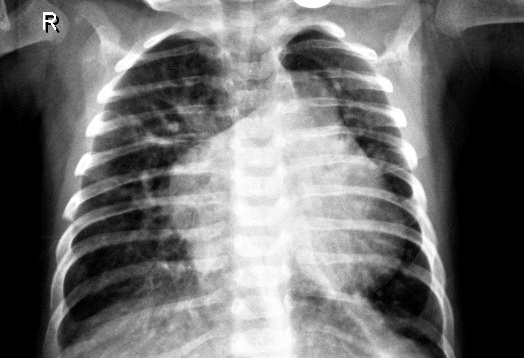

In [226]:
cv2.imwrite('bit_img.jpg', bb)
cv2_imshow(bb)

Take the image obtained from Bit Plane Slicing to do Piecewise linear contrast stretching to improve the contrast in an image by 'stretching' the range of intensity values it contains to span a desired range of values

## Piecewise linear contrast stretching

Contrast stretching (often called normalization) is a simple image enhancement technique that attempts to improve the contrast in an image by 'stretching' the range of intensity values it contains to span a desired range of values

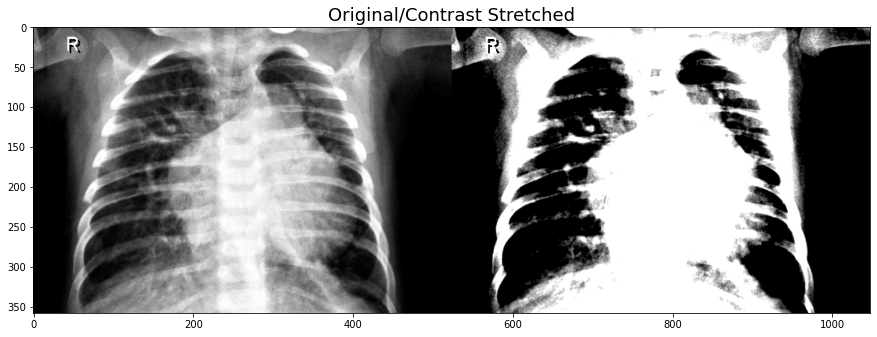

In [227]:
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 

img = cv2.imread('bit_img.jpg',0) 

r1 = 70
s1 = 0
r2= 140
s2 = 255
pixelVal_vec = np.vectorize(pixelVal)
contrast_stretched = pixelVal_vec(img_histeq, r1, s1, r2, s2)
equ=np.hstack((img_histeq,contrast_stretched))
plt.figure(figsize=[15,20])
plt.title("Original/Contrast Stretched", fontsize=18)
plt.imshow(equ,'gray')
plt.show()

In [228]:
cv2.imwrite('img_contrast_stretched.jpg', contrast_stretched)

True

## Gray Level Slicing

in the last step will focuses on enhancing a specific range of grey level in an image. The intervals are pre-defined and pixels falling in that range are manipulated. This can be used to brighten the desired range of grey level while preserving the background quality in the range.

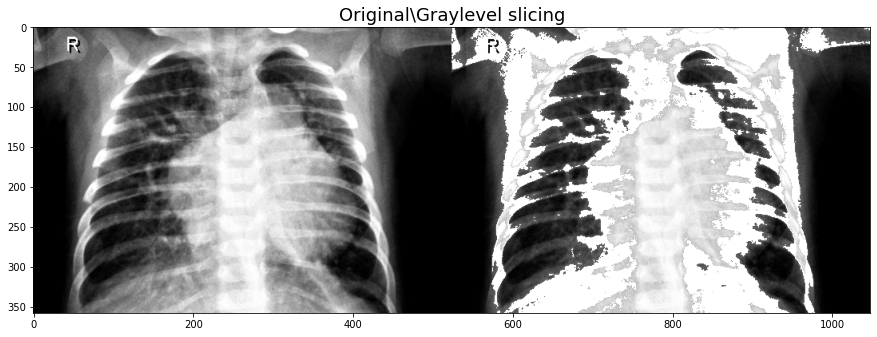

In [229]:
# Load the image
img = cv2.imread("bit_img.jpg",0)

#  Find width and height of image
row, column = img.shape

#  Create an zeros array to store the sliced image
img1 = np.zeros((row,column),dtype = 'uint8')
#  Specify the min and max range
min_range = 100
max_range = 190
#  Loop over the input image and if pixel value lies in desired range set it to 255 otherwise set it to 0.
for i in range(row):
    for j in range(column):
        if img[i,j] > min_range and img[i,j] < max_range:
            img1[i,j] = 255
        else:
            img1[i,j] = img[i,j]

plt.figure(figsize=[15,20])
equ=np.hstack((img,img1))
plt.title('Original\Graylevel slicing',fontsize=18)
plt.imshow(equ,'gray')
plt.show()

image after applying the transformation display a high value of all gray levels in the range of interest and a low value for all other gray levels



After the image has been improved with various techniques This will allow us to get images that are ready to be modeled for machine learning.

The resulting images will give us a clearer view of lung inflammation. This reduces the time it takes to identify the type of pneumonia and allows doctors to make a more accurate diagnosis.